In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Using the entire Train data to train the model

In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')
SAM = pd.read_csv('SAMPLE.csv')

In [3]:
SAM.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [4]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [7]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [8]:
train_num = train.select_dtypes(exclude='object')
train_cat = train.select_dtypes(include='object')

In [9]:
test_num = test.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')

In [10]:
train_num.head()

,Store_id,Holiday,#Order,Sales
0,1,1,9,7011.84
1,253,1,60,51789.12
2,252,1,42,36868.20
3,251,1,23,19715.16
4,250,1,62,45614.52


In [11]:
test_num.head()

,Store_id,Holiday
0,171,0
1,172,0
2,173,0
3,174,0
4,170,0


In [12]:
train_cat.head()

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
0,T1000001,S1,L3,R1,2018-01-01,Yes
1,T1000002,S4,L2,R1,2018-01-01,Yes
2,T1000003,S3,L2,R1,2018-01-01,Yes
3,T1000004,S2,L3,R1,2018-01-01,Yes
4,T1000005,S2,L3,R4,2018-01-01,Yes


In [13]:
train_num.shape, train_cat.shape

((188340, 4), (188340, 6))

In [14]:
test_num.shape,test_cat.shape

((22265, 2), (22265, 6))

In [15]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [16]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [17]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [18]:
train['Date']= pd.to_datetime(train.Date)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

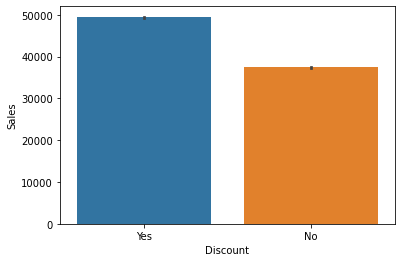

In [19]:
sns.barplot(data=train, x='Discount', y='Sales')

In [20]:
# sns.barplot(data=train, x='Holiday', y='Sales')

In [21]:
# sns.barplot(data=train, x='Discount', y='Sales')

In [22]:
# sns.barplot(data=train, x='Holiday', y='Sales',hue='Discount')

In [23]:
# sns.barplot(data=train, x='Discount', y='Sales',hue='Holiday')

In [24]:
pd.DataFrame([(col,train[col].nunique()) for col in train.columns ],columns=['Feature','Unique values(#)'])

,Feature,Unique values(#)
0,ID,188340
1,Store_id,365
2,Store_Type,4
3,Location_Type,5
4,Region_Code,4
5,Date,516
6,Holiday,2
7,Discount,2
8,#Order,299
9,Sales,47422


In [25]:
train.shape 

(188340, 10)

In [26]:
test.shape

(22265, 8)

In [27]:
#  (train['#Order'].value_counts().sort_values(ascending=False))

In [28]:
# plt.figure(figsize=(12,8))
# sns.pairplot(data=train)
# plt.xticks(rotation=45);

In [29]:
train.Date

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
188335   2019-05-31
188336   2019-05-31
188337   2019-05-31
188338   2019-05-31
188339   2019-05-31
Name: Date, Length: 188340, dtype: datetime64[ns]

In [30]:
train.set_index(train.Date,inplace=True)

In [31]:
del train['Date']
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,1,Yes,9,7011.84
2018-01-01,T1000002,253,S4,L2,R1,1,Yes,60,51789.12
2018-01-01,T1000003,252,S3,L2,R1,1,Yes,42,36868.20
2018-01-01,T1000004,251,S2,L3,R1,1,Yes,23,19715.16
2018-01-01,T1000005,250,S2,L3,R4,1,Yes,62,45614.52


In [32]:
montlhy_mean = train["Sales"].resample('M').mean() 
montlhy_median = train["Sales"].resample('M').median() 


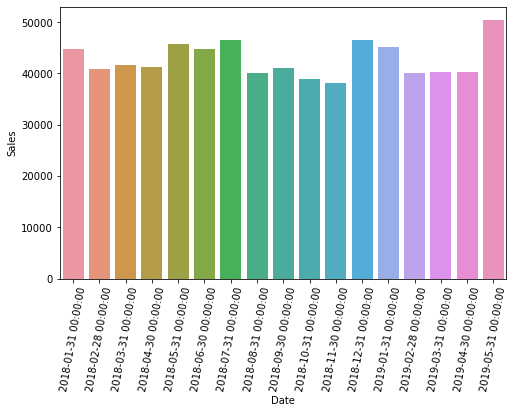

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(y=montlhy_mean, x=montlhy_mean.index )
plt.xticks(rotation=80);

In [34]:
# plt.figure(figsize=(8,5))
# sns.barplot(y=montlhy_median, x=montlhy_median.index )
# plt.xticks(rotation=80);

In [35]:
del train['ID']

In [36]:
train.columns.__len__()

8

In [37]:
train.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', '#Order', 'Sales'],
      dtype='object')

In [38]:
cat_cols = [col for col in train.columns if train[col].dtype in ['object']]
# cat_cols = [col for col in train.columns if train[col].dtype=='object']

num_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

In [39]:
cat_cols,cat_cols.__len__()

(['Store_Type', 'Location_Type', 'Region_Code', 'Discount'], 4)

In [40]:
num_cols ,len(num_cols)

(['Store_id', 'Holiday', '#Order', 'Sales'], 4)

# Removing Store_id as it is not useful and also "Sales" traget value

In [41]:
num_cols=num_cols[:2]
num_cols

['Store_id', 'Holiday']

# Order number is not a feature in test data, so we have to be ignoring it for now

[Text(0.5, 1.0, 'Outlier detection for Train dataset')]

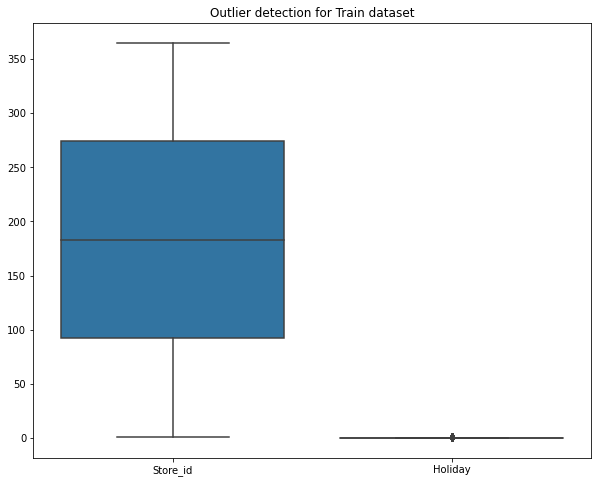

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train[num_cols]).set(title='Outlier detection for Train dataset')
#Does not look useful as of now

In [43]:
# [(col,train.col.dtype) for col in train.columns] #does not work
pd.DataFrame([(col,train[col].dtype) for col in train.columns],columns=['Features','Datatype'])

,Features,Datatype
0,Store_id,int64
1,Store_Type,object
2,Location_Type,object
3,Region_Code,object
4,Holiday,int64
5,Discount,object
6,#Order,int64
7,Sales,float64


In [44]:
train[num_cols ]

,Store_id,Holiday
Date,,
2018-01-01,1,1
2018-01-01,253,1
2018-01-01,252,1
2018-01-01,251,1
2018-01-01,250,1
...,...,...
2019-05-31,149,1
2019-05-31,153,1
2019-05-31,154,1


In [45]:
cat_cols

['Store_Type', 'Location_Type', 'Region_Code', 'Discount']

In [46]:
pd.DataFrame([(col,train[col].nunique()) for col in cat_cols ],columns=['Train Categorical Features','Unique values(#)'])

,Train Categorical Features,Unique values(#)
0,Store_Type,4
1,Location_Type,5
2,Region_Code,4
3,Discount,2


In [47]:
pd.DataFrame([(col,test[col].nunique()) for col in cat_cols ],columns=['Test Categorical Features','Unique values(#)'])

,Test Categorical Features,Unique values(#)
0,Store_Type,4
1,Location_Type,5
2,Region_Code,4
3,Discount,2


In [48]:
train.head()


,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,
2018-01-01,1,S1,L3,R1,1,Yes,9,7011.84
2018-01-01,253,S4,L2,R1,1,Yes,60,51789.12
2018-01-01,252,S3,L2,R1,1,Yes,42,36868.20
2018-01-01,251,S2,L3,R1,1,Yes,23,19715.16
2018-01-01,250,S2,L3,R4,1,Yes,62,45614.52


In [49]:
# del train['Store_id'],#Keeping the store ID

In [50]:
train.head(1)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,
2018-01-01,1,S1,L3,R1,1,Yes,9,7011.84


In [51]:
test.set_index(test.Date,inplace=True)

In [52]:

test.head()


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
Date,,,,,,,,
2019-06-01,T1188341,171,S4,L2,R3,2019-06-01,0,No
2019-06-01,T1188342,172,S1,L1,R1,2019-06-01,0,No
2019-06-01,T1188343,173,S4,L2,R1,2019-06-01,0,No
2019-06-01,T1188344,174,S1,L1,R4,2019-06-01,0,No
2019-06-01,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [53]:
len(test.ID)

22265

In [54]:
idx = test['ID']
del test['ID']

del test['Date'] 

In [55]:
test.head(1)


,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
Date,,,,,,
2019-06-01,171,S4,L2,R3,0,No


In [56]:
train.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', '#Order', 'Sales'],
      dtype='object')

In [57]:
num_cols,cat_cols

(['Store_id', 'Holiday'],
 ['Store_Type', 'Location_Type', 'Region_Code', 'Discount'])

In [58]:
test.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount'],
      dtype='object')

In [59]:
my_cols = num_cols + cat_cols

In [60]:
my_cols

['Store_id',
 'Holiday',
 'Store_Type',
 'Location_Type',
 'Region_Code',
 'Discount']

In [61]:
train[my_cols]

,Store_id,Holiday,Store_Type,Location_Type,Region_Code,Discount
Date,,,,,,
2018-01-01,1,1,S1,L3,R1,Yes
2018-01-01,253,1,S4,L2,R1,Yes
2018-01-01,252,1,S3,L2,R1,Yes
2018-01-01,251,1,S2,L3,R1,Yes
2018-01-01,250,1,S2,L3,R4,Yes
...,...,...,...,...,...,...
2019-05-31,149,1,S2,L3,R2,Yes
2019-05-31,153,1,S4,L2,R1,No
2019-05-31,154,1,S1,L3,R2,No


In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(train[my_cols], train.Sales, test_size=0.3, random_state=0)

In [63]:

# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()
# X_test = X_test_full[my_cols].copy()

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# dir(sklearn.preprocessing)

In [67]:

# Preprocessing for categorical data

categorical_transformer = Pipeline( [('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])
 
numerical_transformer = StandardScaler()


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('sc', numerical_transformer, num_cols )
     ],
#         remainder='passthrough'#This step is very important becasue if not mentioned the columns not given as i/p 
#     will be dropped

    )


In [68]:
# model = XGBClassifier()
# learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
# param_grid = dict(learning_rate=learning_rate)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(X, Y)
# # summarize results

In [69]:
# #XGBoost hyper-parameter tuning
# def hyperParameterTuning(X_train, y_train):
#     param_tuning = {
#         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.5],
# #         'max_depth': [3, 5, 7, 10],
# #         'min_child_weight': [1, 3, 5],
# #         'subsample': [0.5, 0.7],
# #         'colsample_bytree': [0.5, 0.7],
#         'n_estimators' : [100, 200, 500, 1000],
# #         'objective': ['reg:squarederror']
#     }

#     model = XGBRegressor()
    
#     pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('model', model)
#                      ])


#     gsearch = GridSearchCV(estimator = pipe,
#                            param_grid = param_tuning,                        
#                            #scoring = 'neg_mean_absolute_error', #MAE
#                            scoring = 'neg_mean_squared_error',  #MSE
#                            cv = 5,
#                            n_jobs = -1,
#                            verbose = 1)
    
    
    

#     gsearch.fit(X_train,y_train)

#     return gsearch.best_params_

In [70]:
# hyperParameterTuning(X_train, y_train)

In [71]:

# model = RandomForestRegressor(n_estimators=100, random_state=0)
# model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)
 
# Bundle preprocessing and modeling code in a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds1 = pipe.predict(X_valid)


from sklearn.metrics import mean_squared_log_error


In [72]:
print('MSLE:',mean_squared_log_error(y_valid, preds1)*1000)

MSLE: 99.81460572278625


In [73]:
X_valid.head(1)

,Store_id,Holiday,Store_Type,Location_Type,Region_Code,Discount
Date,,,,,,
2018-12-14,175,0,S4,L2,R1,No


In [74]:
train.head(1)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,
2018-01-01,1,S1,L3,R1,1,Yes,9,7011.84


# Retraining on the entire training data since msle is ok for now for random forest

In [75]:
pipe.fit(train[my_cols], train['Sales'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Store_Type',
                                                   'Location_Type',
                                                   'Region_Code', 'Discount']),
                                                 ('sc', StandardScaler(),
                                                  ['Store_id', 'Holiday'])])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.5, gamma=0, gpu_id=-1,
                             

In [76]:
pipe.steps

[('preprocessor',
  ColumnTransformer(transformers=[('cat',
                                   Pipeline(steps=[('onehot',
                                                    OneHotEncoder(handle_unknown='ignore',
                                                                  sparse=False))]),
                                   ['Store_Type', 'Location_Type', 'Region_Code',
                                    'Discount']),
                                  ('sc', StandardScaler(),
                                   ['Store_id', 'Holiday'])])),
 ('model',
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.05, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
 

In [77]:
preds = pipe.predict(test[my_cols])

In [78]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [79]:


# # Apply one-hot encoder to each column with categorical data
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[cat_cols]))
# OH_cols_test = pd.DataFrame(OH_encoder.transform(test[cat_cols]))

# # One-hot encoding removed index; put it back
# OH_cols_train.index = train.index
# OH_cols_test.index = test.index

# # Remove categorical columns (will replace with one-hot encoding)
# # num_X_train = X_train.drop(object_cols, axis=1)
# # num_X_valid = X_valid.drop(object_cols, axis=1)
# num_train = pd.DataFrame(scaler.fit_transform(train[num_cols]),columns=['Store_id','Holiday'],index=train[num_cols].index)
# num_test = pd.DataFrame(scaler.transform(test[num_cols]),columns=['Store_id','Holiday'],index=test[num_cols].index)

# # num_train =  (train[num_cols])
# # num_test =  (test[num_cols])



In [80]:
# num_test = pd.Series()

In [81]:
# len(train[num_cols].index)

In [82]:
# OH_cols_train

In [83]:

# # Add one-hot encoded columns to numerical features
# OH_train = pd.concat([num_train, OH_cols_train], axis=1)
# OH_test = pd.concat([num_test, OH_cols_test], axis=1)

In [84]:
# OH_train

In [85]:

# from sklearn.

# model = RandomForestRegressor(n_estimators=100, random_state=0)
# model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# fin_model.fit(X, train['Sales'])

In [86]:
# model.fit(OH_train, train.Sales)

# preds3 = model.predict(OH_test)

In [87]:
test.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
Date,,,,,,
2019-06-01,171,S4,L2,R3,0,No
2019-06-01,172,S1,L1,R1,0,No
2019-06-01,173,S4,L2,R1,0,No
2019-06-01,174,S1,L1,R4,0,No
2019-06-01,170,S1,L1,R2,0,No


In [88]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,
2018-01-01,1,S1,L3,R1,1,Yes,9,7011.84
2018-01-01,253,S4,L2,R1,1,Yes,60,51789.12
2018-01-01,252,S3,L2,R1,1,Yes,42,36868.20
2018-01-01,251,S2,L3,R1,1,Yes,23,19715.16
2018-01-01,250,S2,L3,R4,1,Yes,62,45614.52


In [89]:
# len(preds ),len(preds3)

In [90]:
# (preds == preds3)

In [91]:
# preds[1], preds3[1]

In [92]:
# sum(preds),sum(preds3)

In [93]:
output = pd.DataFrame({'ID': idx,
                       'Sales': preds })

In [94]:
output

,ID,Sales
Date,,
2019-06-01,T1188341,49268.578125
2019-06-01,T1188342,35033.863281
2019-06-01,T1188343,68099.023438
2019-06-01,T1188344,34215.988281
2019-06-01,T1188345,36631.683594
...,...,...
2019-07-31,T1210601,20697.216797
2019-07-31,T1210602,57474.445312
2019-07-31,T1210603,48263.347656


In [95]:

output.to_csv('submission3_1.csv', index=False)

In [96]:
# score = mean_absolute_error(y_valid, preds)
# print('MAE:', score)

In [97]:
# # categorical_transformer = Pipeline(steps=[
# #     ('Le', LabelEncoder())])

# categorical_transformer = Pipeline(steps=[
#     ('Le', LabelEncoder())])



# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
# #         ('num', numerical_transformer, num_cols),
#         ('cat', categorical_transformer, cat_cols)
#     ])

In [98]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# # Function for comparing different approaches
# def score_dataset(X_train, X_valid, y_train, y_valid):
#     model = RandomForestRegressor(n_estimators=100, random_state=0)
#     model.fit(X_train, y_train)
#     preds = model.predict(X_valid)
#     return mean_absolute_error(y_valid, preds)

In [99]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=100, random_state=0)

In [100]:
# from sklearn.metrics import mean_absolute_error

# # Bundle preprocessing and modeling code in a pipeline
# my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                               ('model', model)
#                              ])

# # Preprocessing of training data, fit model 
# my_pipeline.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
# preds = my_pipeline.predict(X_valid)

# # Evaluate the model
# score = mean_absolute_error(y_valid, preds)
# print('MAE:', score)